##  **Taylor series with python and Sympy**

Taylor series

$$ f(x) =\sum_{n=0}^{\infty}\frac{f^{(n)}a}{n!}(x-a)^n $$

where $f^{(n)}$ is the $n^{th}$ derivative of $f$

[Refer to firsttimeprogrammer by Mic](http://firsttimeprogrammer.blogspot.com/2017/08/taylor-series-with-python-and-sympy.html)

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
%matplotlib inline

# factorial function
def factorial(n):
    if n<=0:
        return 1
    else:
        return n*factorial(n-1)

# tylor approximation at x = x0 of the function f(x)
def tylor(func, x0, n):
    i = 0 # ith power
    p = 0
    
    while i <= n:
        p += func.diff(x, i).subs(x, x0)/factorial(i)*(x - x0)**i
        i += 1
    return p

# function to approximate
def f(x):
    return sin(x)

In [2]:
# x = Symbol('x')
# # test the tylor function
# print(tylor(f(x), 0, 5))
# tylorSeries = sin(x).series(x, 0, 6).removeO()
# Eq(tylor(f(x), 0, 5),tylorSeries)

In [3]:
# plot the tylor series
def plot(f):
    x_lims = [-2*np.pi, 2*np.pi]
    x1 = np.linspace(x_lims[0], x_lims[1], 100)
    y1 = []

    # plot tylor series with up to 10 starting from 1 with steps = 2

    for j in range(1, 10, 2):
        for k in x1:
            fx_tylor = tylor(f, 0 , j)
            y1.append(fx_tylor.subs(x, k))
        #plt.plot(x1, y1, label = 'order ' + str(j) + ', fx =' + str(fx_tylor))
        plt.plot(x1, y1, label = 'order ' + str(j))
        y1 = []
    plt.plot(x1, np.sin(x1), label = 'sin(x)')
    plt.ylim([-5, 5])
    plt.grid(True)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Tylor series approximation')
    plt.show()


In [4]:
# plot the tylor series
# Lambdify (from the sympy package) is used to speed up the computation.

def plotRevised(f, x0 = 0, n =9, step = 2):
    x_lims = [-2*np.pi, 2*np.pi]
    x1 = np.linspace(x_lims[0], x_lims[1], 100)

    # plot tylor series with up to 10 starting from 1 with steps = 2

    for j in range(1, n + 1, step):
            fx_tylor = tylor(f, x0 , j)
            taylor_lambda = lambdify(x, fx_tylor, "numpy")
            plt.plot(x1, taylor_lambda(x1), label = 'order ' + str(j))
            
    f_lambda = lambdify(x, f, "numpy")    
    plt.plot(x1, f_lambda(x1), label = 'sin(x)')
    plt.ylim([-5, 5])
    plt.grid(True)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Tylor series approximation')
    plt.show()

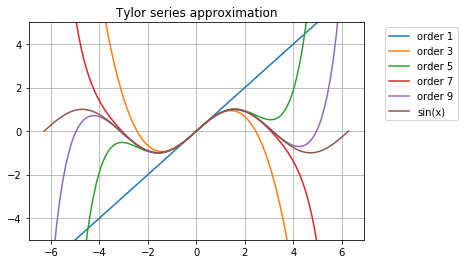

0.3354429 seconds


In [5]:
x = Symbol('x')
start_01 = timer()
plotRevised(f(x))
end_01 = timer()
print(str(end_01 - start_01) + ' seconds')

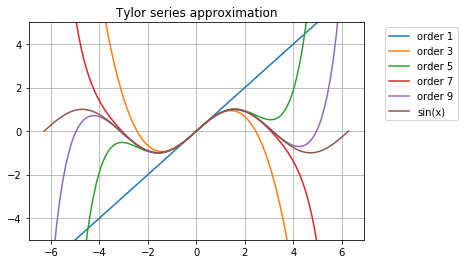

3.4781959 seconds


In [6]:
x = Symbol('x')
start_01 = timer()
plot(f(x))
end_01 = timer()
print(str(end_01 - start_01) +' seconds')